# Clustering Images


In [1]:
from numpy import concatenate, zeros, linspace

from matplotlib.pyplot import subplots

from matplotlib.image import imread


## Load images and get data

(1806, 2638, 4)

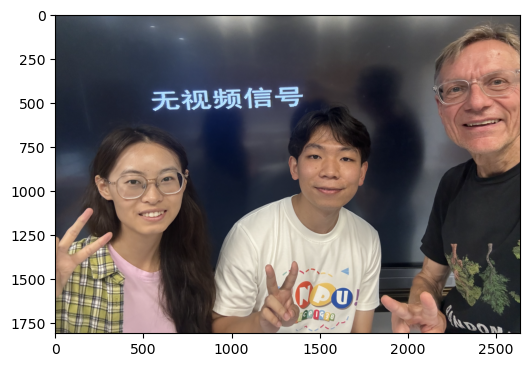

In [2]:
img = imread('photo_2.png')

fig, ax = subplots(figsize=(6, 5))

ax.imshow(img);

img.shape


In [3]:
downsample = 10

img_r = img[::downsample, ::downsample, 0].reshape(-1, 1)
img_g = img[::downsample, ::downsample, 1].reshape(-1, 1)
img_b = img[::downsample, ::downsample, 2].reshape(-1, 1)

img_reshaped = concatenate((img_r, img_g, img_b), axis = 1)

img_reshaped.shape

(47784, 3)

In [4]:
img[0, 1000:1010, 0]

array([0.76862746, 0.77254903, 0.77254903, 0.77254903, 0.76862746,
       0.77254903, 0.7607843 , 0.7607843 , 0.75686276, 0.7607843 ],
      dtype=float32)

## Visualise and Concatenate

Seaborn: https://seaborn.pydata.org

c.f. pair grid example
https://seaborn.pydata.org/examples/pair_grid_with_kde.html

kdeplot documentation
https://seaborn.pydata.org/generated/seaborn.kdeplot.html




/Users/geroldbaier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/geroldbaier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


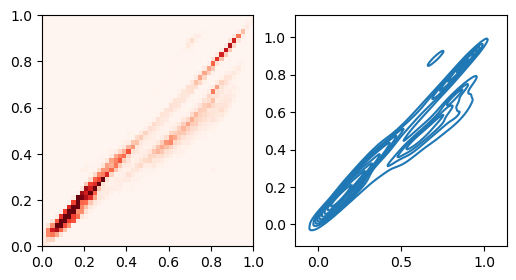

In [5]:
fig, ax = subplots(ncols=2, figsize=(6, 3))

# 2D Histogram
ax[0].hist2d(img_reshaped[:, 0], img_reshaped[:, 1], bins=50, vmax=500, cmap='Reds');

from seaborn import kdeplot

# Density Plot
kdeplot(x=img_reshaped[:, 0], y=img_reshaped[:, 1], ax=ax[1]);


# GMM clustering


In [6]:
from sklearn.mixture import GaussianMixture

In [7]:
n_components = 5

SEED = 12345

gmm = GaussianMixture(n_components=n_components, random_state=SEED)

all_img_labels = gmm.fit_predict(img_reshaped)

all_img_labels[0]


4

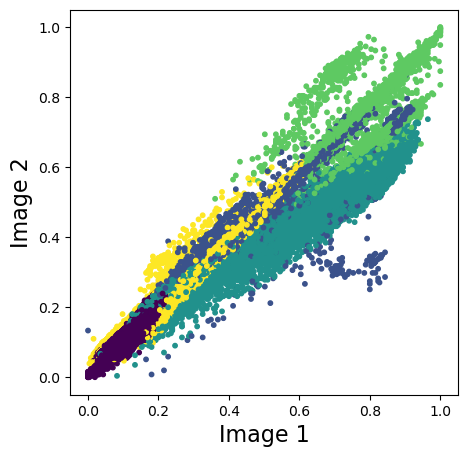

In [8]:
fig, ax = subplots(figsize=(5, 5))

ax.scatter(img_reshaped[:, 0], img_reshaped[:, 1], c=all_img_labels, s=10)

ax.set_xlabel('Image 1', fontsize=16)
ax.set_ylabel('Image 2', fontsize=16);


In [9]:
all_img_labels_mapped = zeros(img[::downsample, ::downsample, 0].shape)

mask = all_img_labels_mapped>-1

all_img_labels_mapped[mask] = all_img_labels


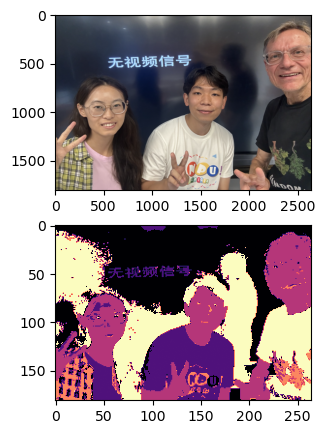

In [10]:
fig, ax = subplots(nrows=2, figsize=(5, 5))

ax[0].imshow(img, cmap='gray');
ax[1].imshow(all_img_labels_mapped, cmap='magma_r');
